In [4]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv('/content/Titanic_train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


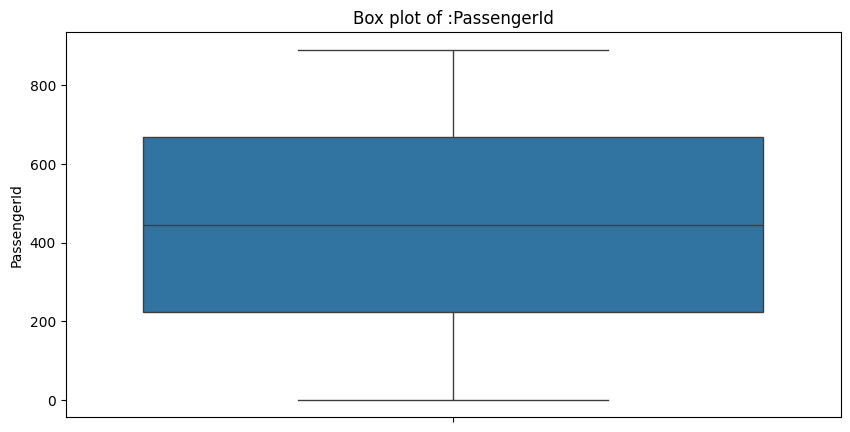

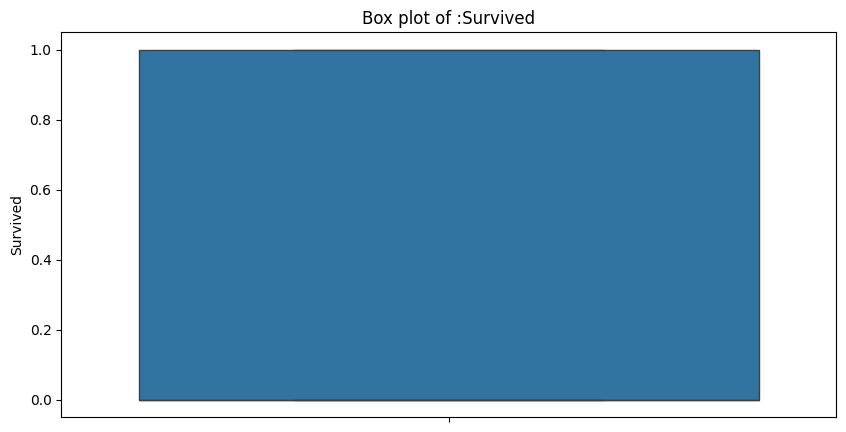

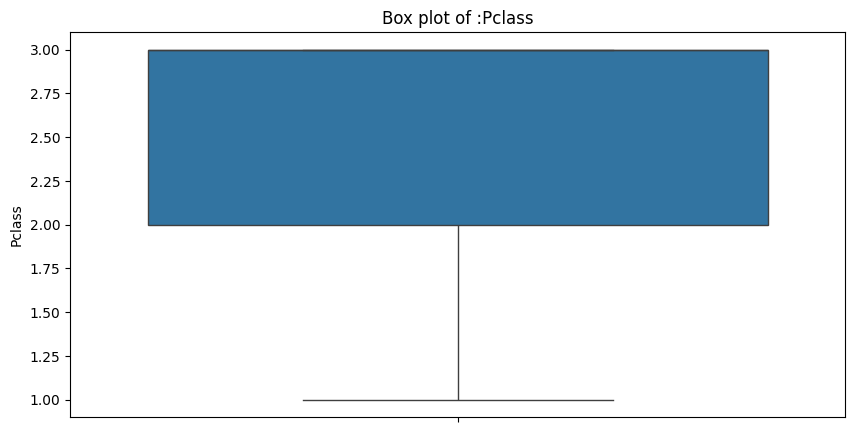

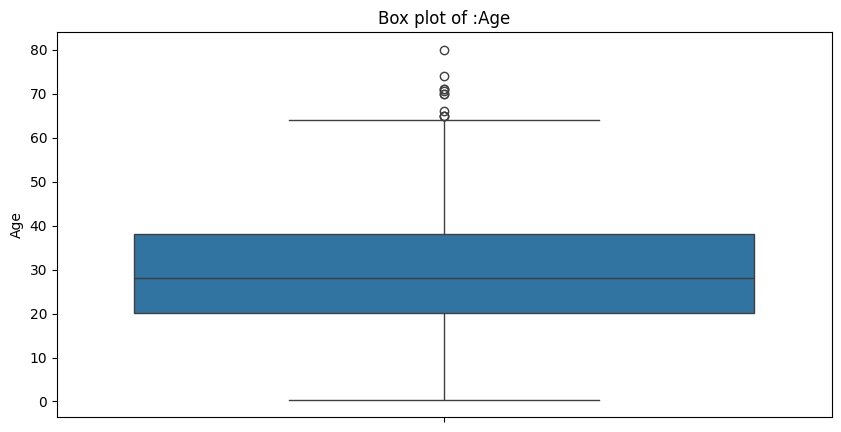

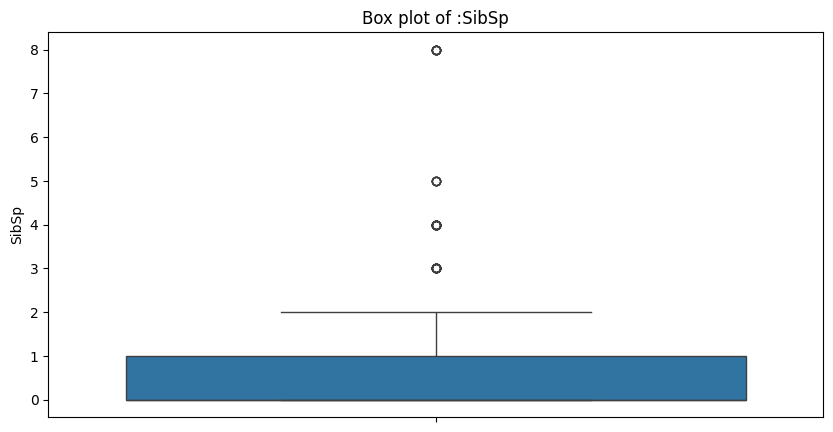

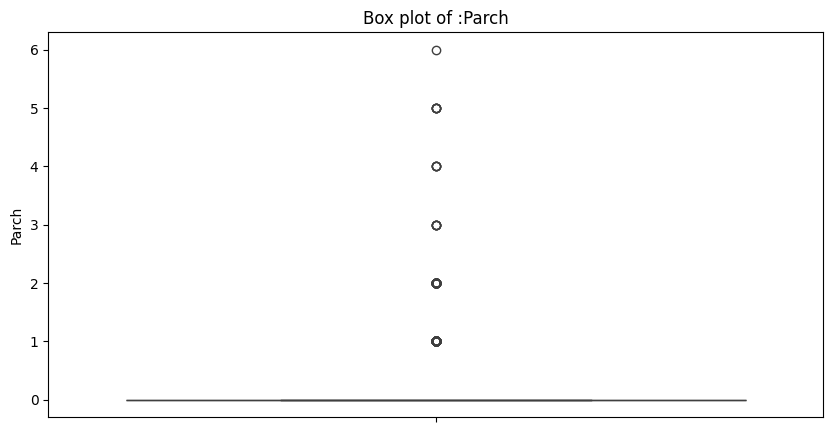

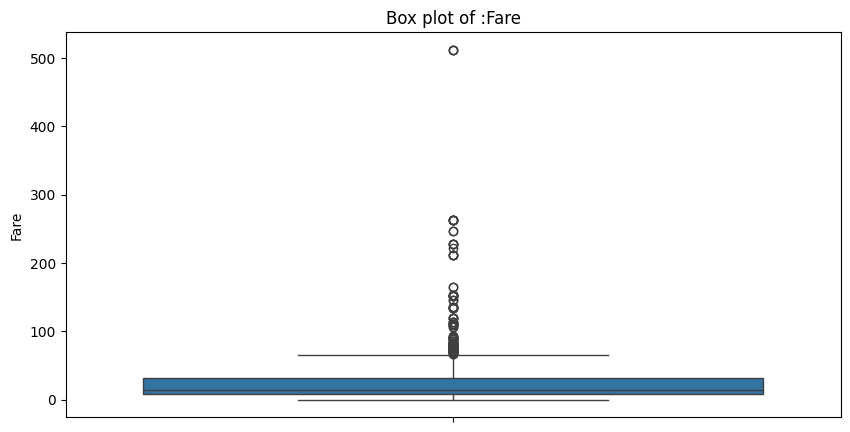

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns=df.select_dtypes(include=['int64','float64'])
for col in numeric_columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.title("Box plot of :" +col)
  plt.show()

We find outliers at Fare,Parch , SibSP,Age we will remove in preprocessing stage

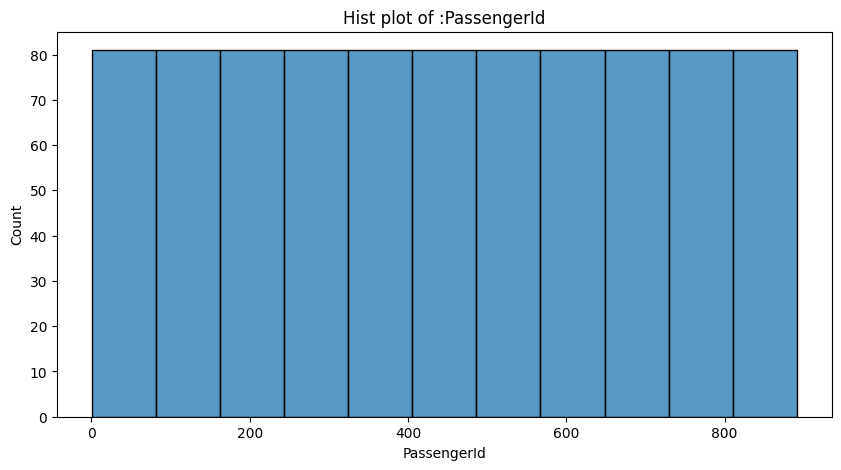

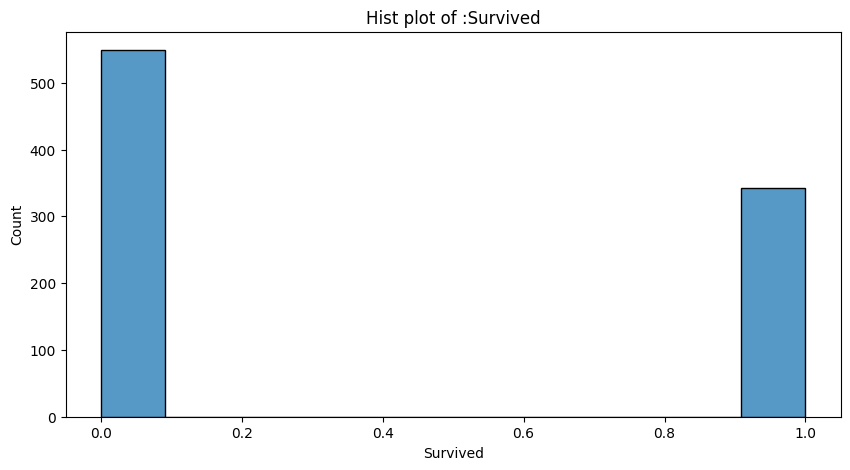

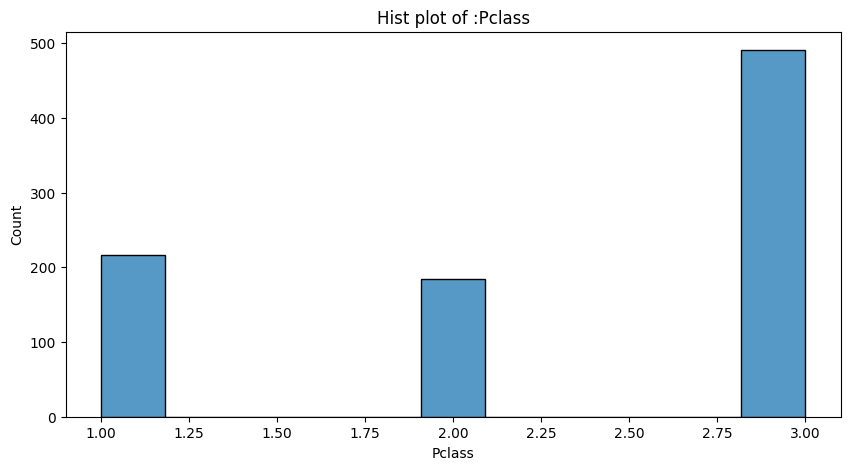

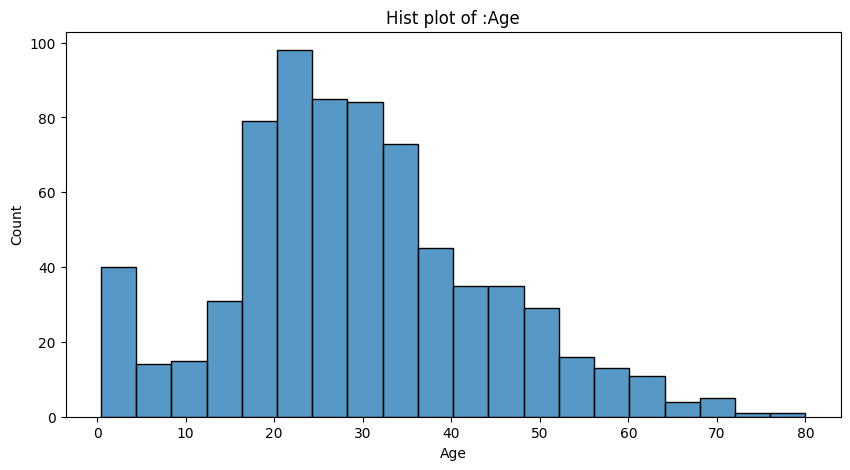

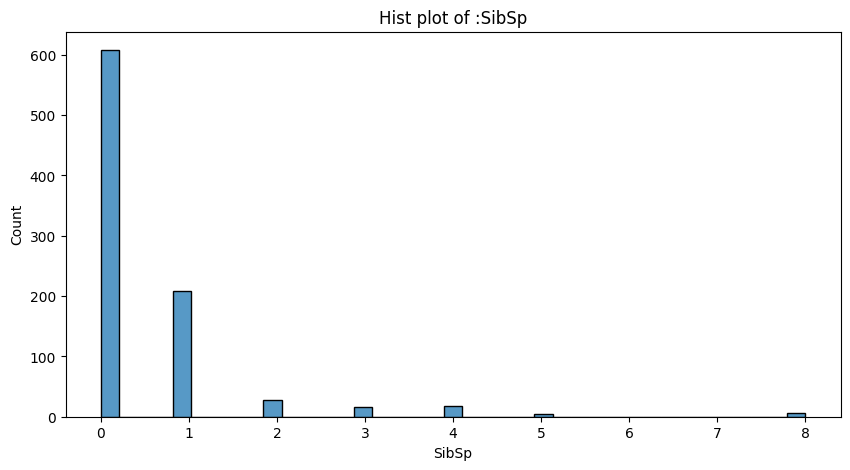

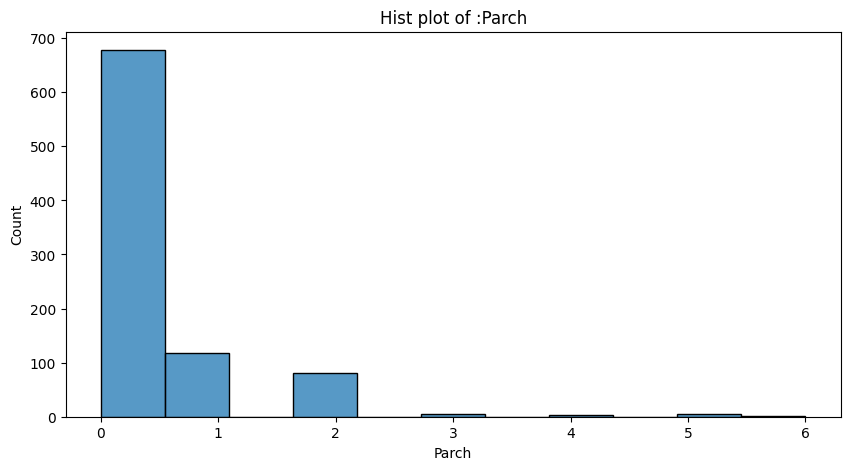

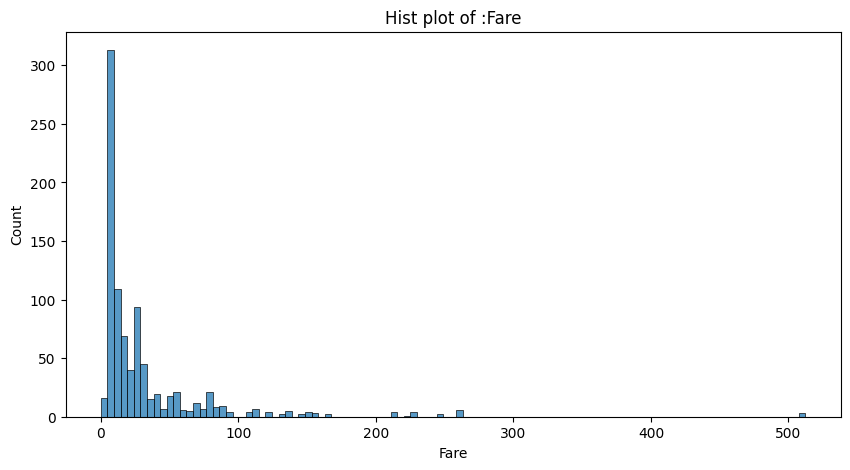

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns=df.select_dtypes(include=['int64','float64'])
for col in numeric_columns:
  plt.figure(figsize=(10,5))
  sns.histplot(df[col])
  plt.title("Hist plot of :" +col)
  plt.show()

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Scatter plot between survived and other numeric columns

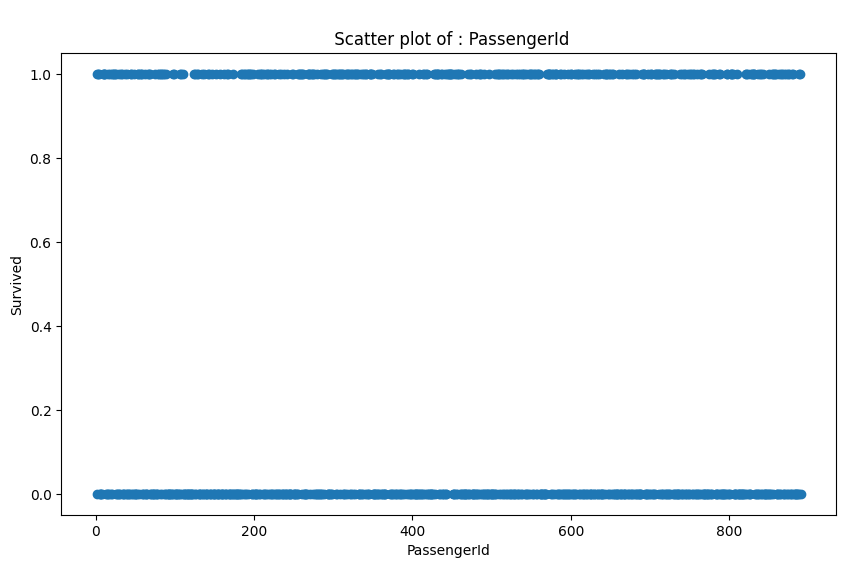

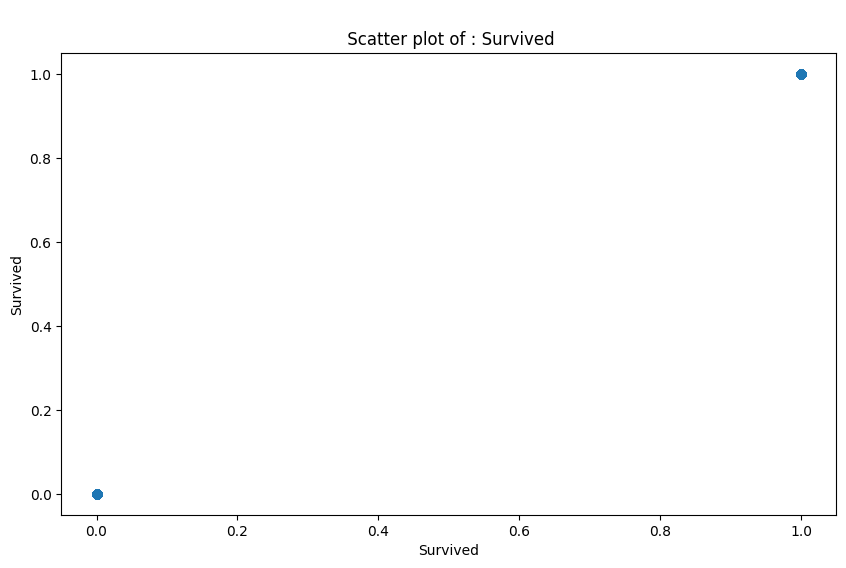

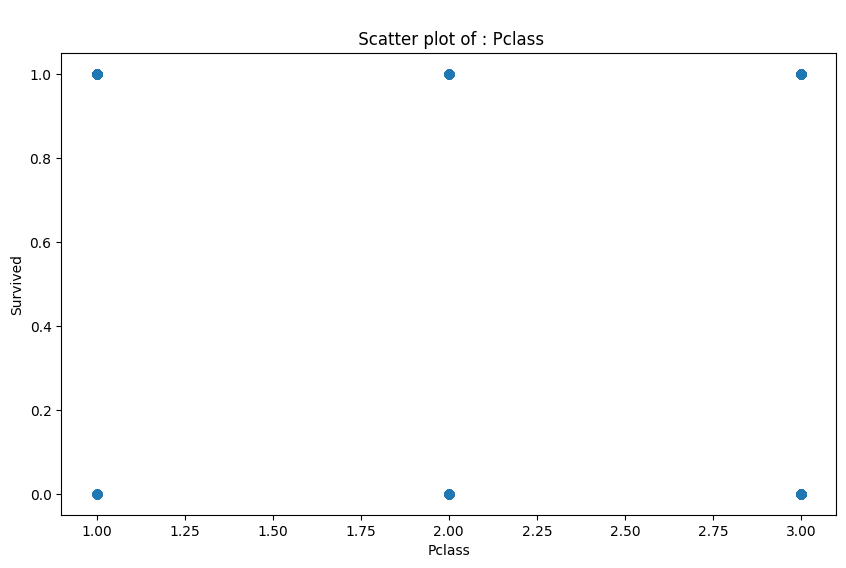

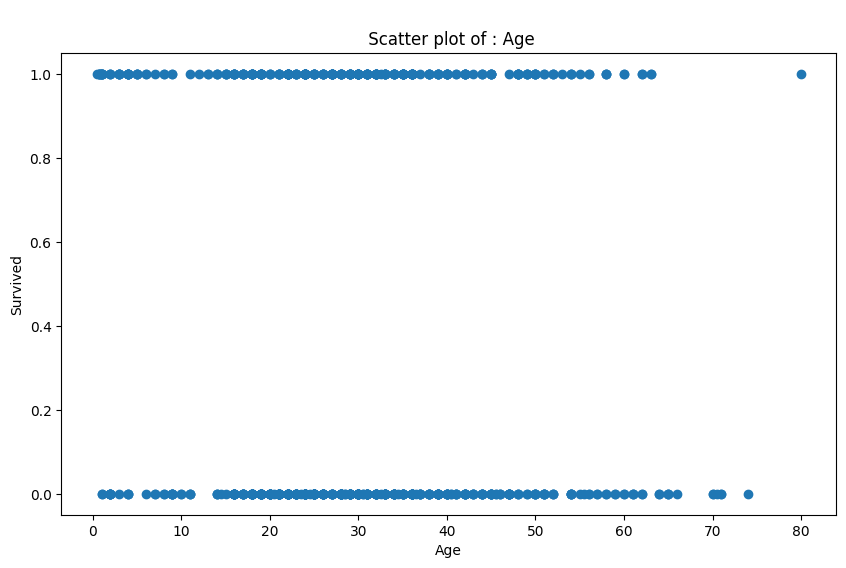

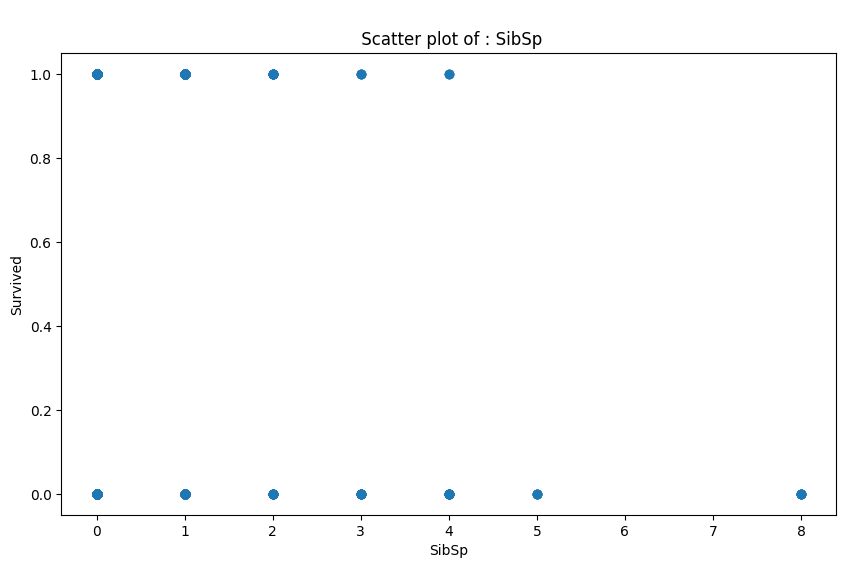

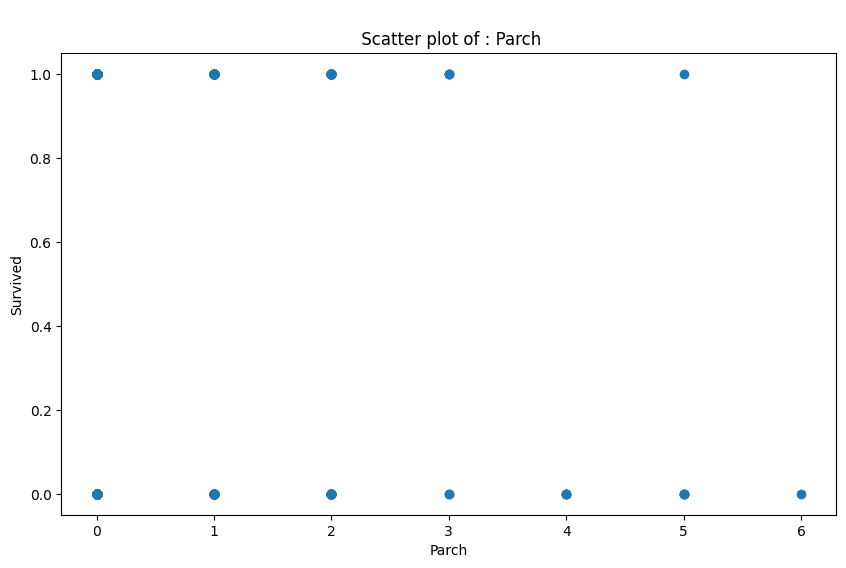

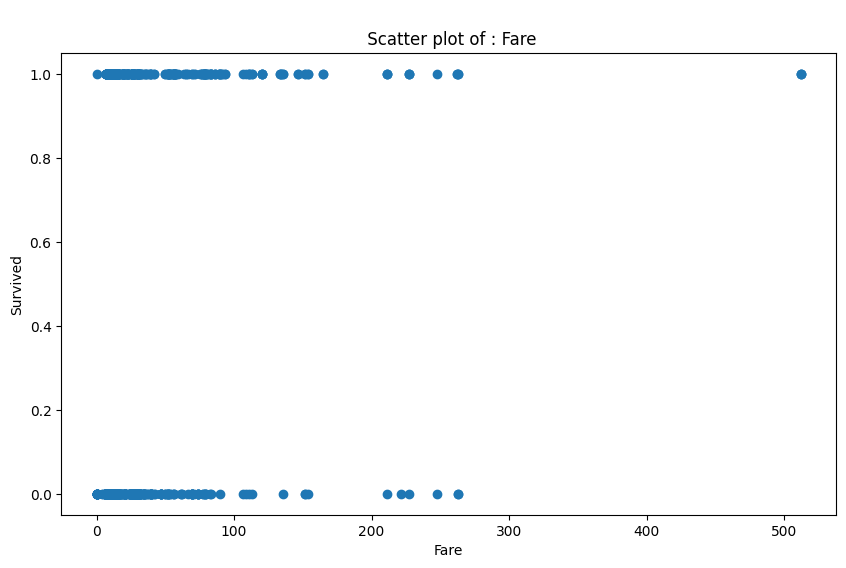

In [12]:
import matplotlib.pyplot as plt
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  x=df[col]
  y=df['Survived']
  plt.scatter(x,y)
  plt.xlabel(col)
  plt.ylabel('Survived')
  plt.title("\n Scatter plot of : " +col)
  plt.show()

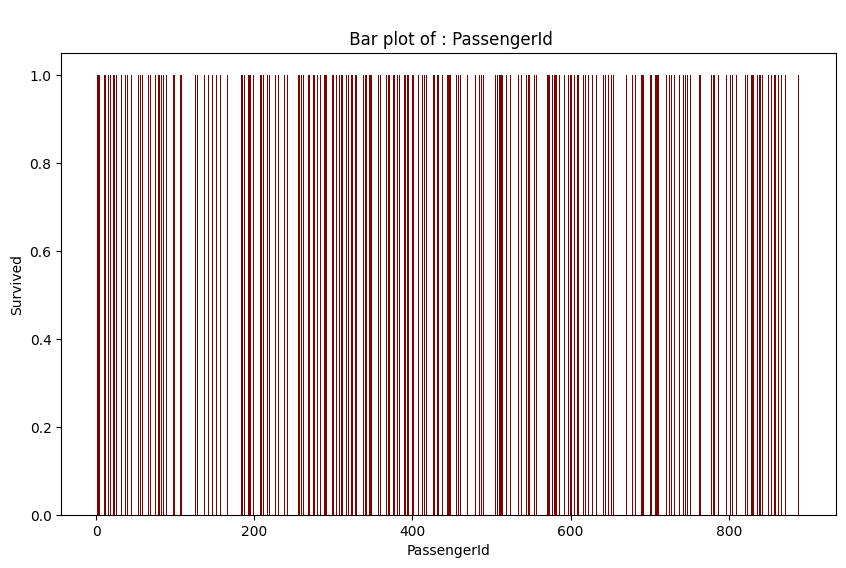

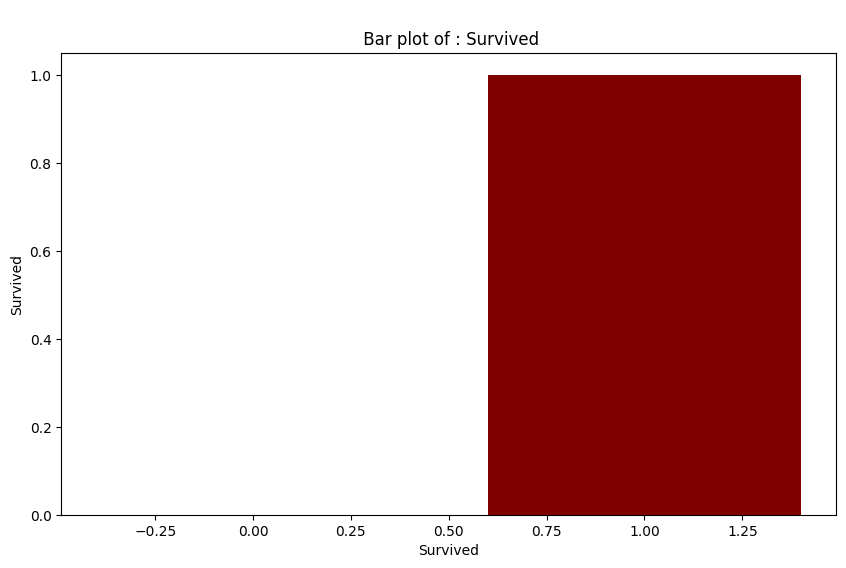

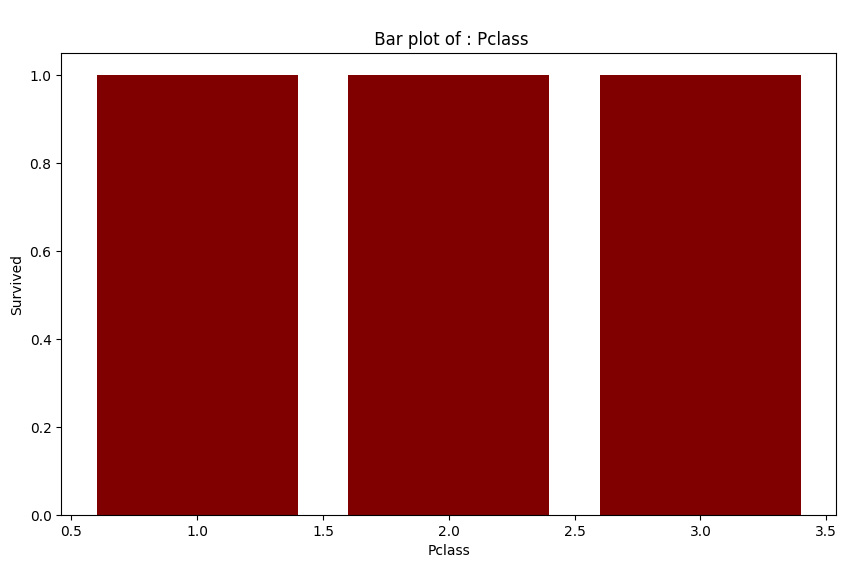

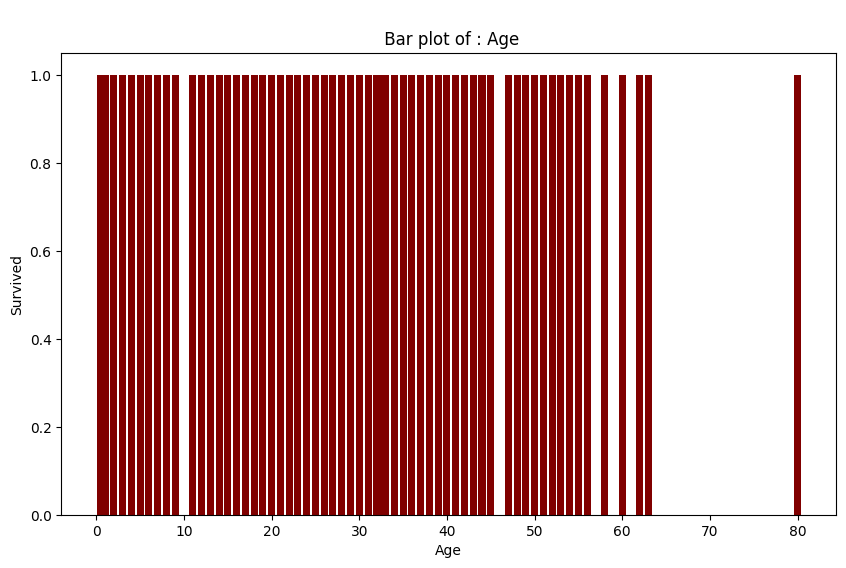

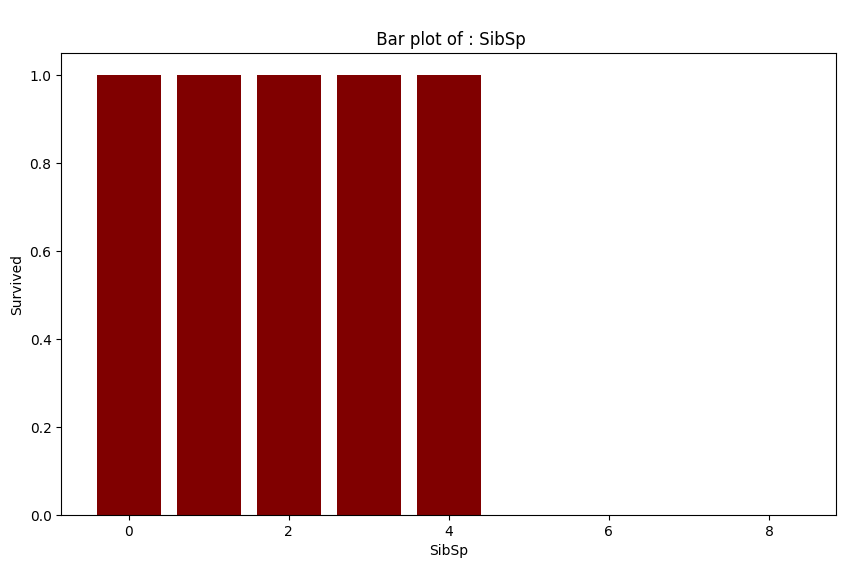

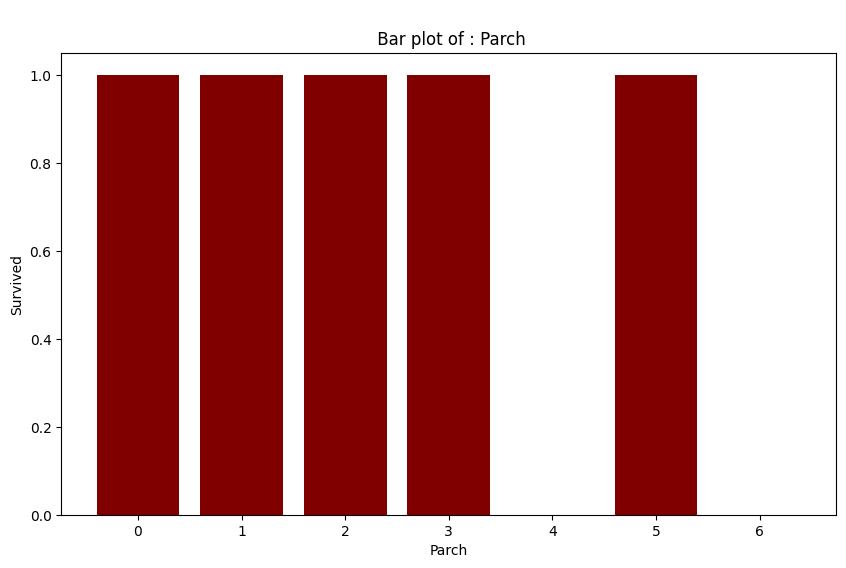

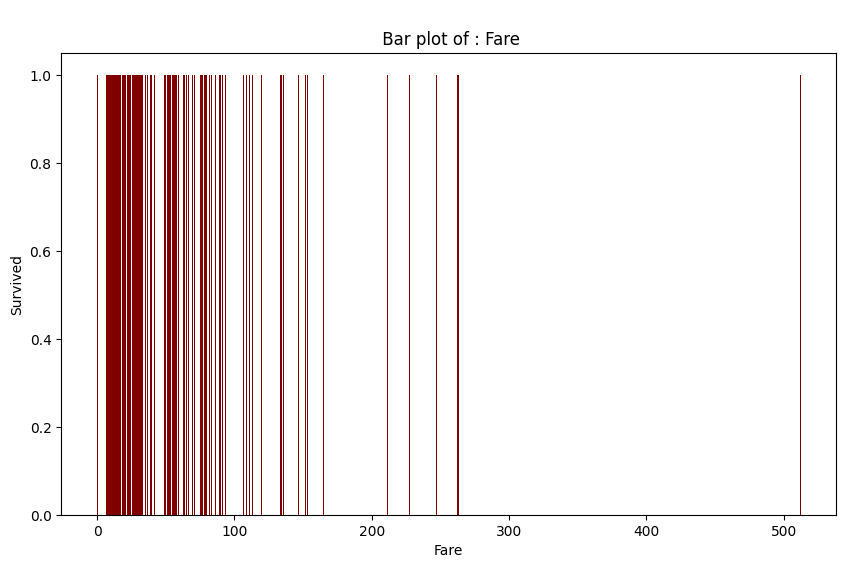

In [13]:
import matplotlib.pyplot as plt
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  x=df[col]
  y=df['Survived']
  plt.bar(x,y,color='maroon')
  plt.xlabel(col)
  plt.ylabel('Survived')
  plt.title("\n Bar plot of : " +col)
  plt.show()

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [16]:
mode=df['Cabin'].mode()
df['Cabin']=df['Cabin'].fillna(mode[0])

In [17]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [20]:
import re
def clean_names(names):
    names = re.sub(r'[,\(\)]', ' ', names)
    names = re.sub(r'\s+', ' ', names).strip()
    return names

df['Names_cleaned'] = df['Name'].apply(clean_names)
print(df['Names_cleaned'].head())

0                              Braund Mr. Owen Harris
1    Cumings Mrs. John Bradley Florence Briggs Thayer
2                               Heikkinen Miss. Laina
3           Futrelle Mrs. Jacques Heath Lily May Peel
4                             Allen Mr. William Henry
Name: Names_cleaned, dtype: object


In [21]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
import re
def clean_and_split_names(names):

    names = re.sub(r'\(|\)', ',', names)
    names_list = [name.strip() for name in names.split(',') if name.strip()]
    return names_list

df['Names_split'] = df['Name'].apply(clean_and_split_names)

# Step 2: Flatten the list of names to get unique names
all_names = [name for sublist in df['Names_split'] for name in sublist]
unique_names = list(set(all_names))

# Step 3: Label encode the unique names
label_encoder = LabelEncoder()
label_encoder.fit(unique_names)
name_encoding = {name: label_encoder.transform([name])[0] for name in unique_names}

# Step 4: Replace the names with encoded values
df['Names_encoded'] = df['Names_split'].apply(lambda x: [name_encoding[name] for name in x])

In [23]:
print(df['Names_encoded'])

0           [114, 1085]
1      [188, 1271, 270]
2            [342, 692]
3      [285, 1263, 461]
4            [37, 1205]
             ...       
886         [760, 1410]
887          [309, 710]
888          [396, 625]
889          [89, 1015]
890         [213, 1087]
Name: Names_encoded, Length: 891, dtype: object


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature=['Age','Fare','Parch','SibSp']
df[feature]=scaler.fit_transform(df[feature])


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Names_cleaned,Names_split,Names_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,B96 B98,S,Braund Mr. Owen Harris,"[Braund, Mr. Owen Harris]","[114, 1085]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,0.432793,-0.473674,PC 17599,0.786845,C85,C,Cumings Mrs. John Bradley Florence Briggs Thayer,"[Cumings, Mrs. John Bradley, Florence Briggs T...","[188, 1271, 270]"
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,B96 B98,S,Heikkinen Miss. Laina,"[Heikkinen, Miss. Laina]","[342, 692]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,0.432793,-0.473674,113803,0.420730,C123,S,Futrelle Mrs. Jacques Heath Lily May Peel,"[Futrelle, Mrs. Jacques Heath, Lily May Peel]","[285, 1263, 461]"
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,-0.474545,-0.473674,373450,-0.486337,B96 B98,S,Allen Mr. William Henry,"[Allen, Mr. William Henry]","[37, 1205]"


In [27]:
def clean_and_split_cabins(cabins):
    cabins_list = [cabin.strip() for cabin in cabins.split(' ') if cabin.strip()]
    return cabins_list

df['Cabin_split'] = df['Cabin'].apply(clean_and_split_cabins)
all_cabins = [cabin for sublist in df['Cabin_split'] for cabin in sublist]
unique_cabins = list(set(all_cabins))
label_encoder = LabelEncoder()
label_encoder.fit(unique_cabins)
cabin_encoding = {cabin: label_encoder.transform([cabin])[0] for cabin in unique_cabins}


df['Cabin_encoded'] = df['Cabin_split'].apply(lambda x: [cabin_encoding[cabin] for cabin in x])

In [28]:
print(df['Cabin_encoded'])

0      [54, 55]
1          [93]
2      [54, 55]
3          [63]
4      [54, 55]
         ...   
886    [54, 55]
887        [30]
888    [54, 55]
889        [68]
890    [54, 55]
Name: Cabin_encoded, Length: 891, dtype: object


In [29]:
def clean_ticket(ticket):
    return ticket.strip()

df['Ticket_cleaned'] = df['Ticket'].apply(clean_ticket)

# Step 2: Label encode the unique ticket numbers
label_encoder = LabelEncoder()
df['Ticket_encoded'] = label_encoder.fit_transform(df['Ticket_cleaned'])

In [30]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})

In [31]:
df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [32]:
df = df.drop(columns=['Cabin', 'Cabin_split','Names_cleaned', 'Names_split','Ticket_cleaned','Name'])


In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Names_encoded,Cabin_encoded,Ticket_encoded
0,1,0,3,0,-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,S,"[114, 1085]","[54, 55]",523
1,2,1,1,1,0.638789,0.432793,-0.473674,PC 17599,0.786845,C,"[188, 1271, 270]",[93],596
2,3,1,3,1,-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,S,"[342, 692]","[54, 55]",669
3,4,1,1,1,0.407926,0.432793,-0.473674,113803,0.420730,S,"[285, 1263, 461]",[63],49
4,5,0,3,0,0.407926,-0.474545,-0.473674,373450,-0.486337,S,"[37, 1205]","[54, 55]",472


In [34]:
df=df.drop(columns=['Ticket'])

In [35]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Names_encoded,Cabin_encoded,Ticket_encoded
0,1,0,3,0,-0.592481,0.432793,-0.473674,-0.502445,S,"[114, 1085]","[54, 55]",523
1,2,1,1,1,0.638789,0.432793,-0.473674,0.786845,C,"[188, 1271, 270]",[93],596
2,3,1,3,1,-0.284663,-0.474545,-0.473674,-0.488854,S,"[342, 692]","[54, 55]",669
3,4,1,1,1,0.407926,0.432793,-0.473674,0.420730,S,"[285, 1263, 461]",[63],49
4,5,0,3,0,0.407926,-0.474545,-0.473674,-0.486337,S,"[37, 1205]","[54, 55]",472


In [36]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [37]:
mode_embarked = df['Embarked'].mode()[0]

df['Embarked'] = df['Embarked'].fillna(mode_embarked)

df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

df['Embarked'] = df['Embarked'].astype(int)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Names_encoded,Cabin_encoded,Ticket_encoded
0,1,0,3,0,-0.592481,0.432793,-0.473674,-0.502445,0,"[114, 1085]","[54, 55]",523
1,2,1,1,1,0.638789,0.432793,-0.473674,0.786845,1,"[188, 1271, 270]",[93],596
2,3,1,3,1,-0.284663,-0.474545,-0.473674,-0.488854,0,"[342, 692]","[54, 55]",669
3,4,1,1,1,0.407926,0.432793,-0.473674,0.420730,0,"[285, 1263, 461]",[63],49
4,5,0,3,0,0.407926,-0.474545,-0.473674,-0.486337,0,"[37, 1205]","[54, 55]",472


### **Test Data**

In [39]:
test_df=pd.read_csv('/content/Titanic_test.csv')

In [40]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Cabin']=test_df['Cabin'].fillna(mode[0])

In [44]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [45]:
df['Fare']=df['Fare'].dropna()

In [47]:
from sklearn.preprocessing import LabelEncoder
import re
def clean_and_split_names(names):

    names = re.sub(r'\(|\)', ',', names)
    names_list = [name.strip() for name in names.split(',') if name.strip()]
    return names_list

test_df['Names_split'] = test_df['Name'].apply(clean_and_split_names)


all_names = [name for sublist in test_df['Names_split'] for name in sublist]
unique_names = list(set(all_names))

label_encoder = LabelEncoder()
label_encoder.fit(unique_names)
name_encoding = {name: label_encoder.transform([name])[0] for name in unique_names}
test_df['Names_encoded'] = test_df['Names_split'].apply(lambda x: [name_encoding[name] for name in x])

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature=['Age','Fare','Parch','SibSp']
test_df[feature]=scaler.fit_transform(test_df[feature])


In [49]:
def clean_and_split_cabins(cabins):
    cabins_list = [cabin.strip() for cabin in cabins.split(' ') if cabin.strip()]
    return cabins_list

test_df['Cabin_split'] = test_df['Cabin'].apply(clean_and_split_cabins)
all_cabins = [cabin for sublist in test_df['Cabin_split'] for cabin in sublist]
unique_cabins = list(set(all_cabins))
label_encoder = LabelEncoder()
label_encoder.fit(unique_cabins)
cabin_encoding = {cabin: label_encoder.transform([cabin])[0] for cabin in unique_cabins}


test_df['Cabin_encoded'] = test_df['Cabin_split'].apply(lambda x: [cabin_encoding[cabin] for cabin in x])

In [50]:
def clean_ticket(ticket):
    return ticket.strip()

test_df['Ticket_cleaned'] = test_df['Ticket'].apply(clean_ticket)

# Step 2: Label encode the unique ticket numbers
label_encoder = LabelEncoder()
test_df['Ticket_encoded'] = label_encoder.fit_transform(test_df['Ticket_cleaned'])

In [52]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Names_split,Names_encoded,Cabin_split,Cabin_encoded,Ticket_cleaned,Ticket_encoded
0,892,3,"Kelly, Mr. James",male,-0.543817,-0.499470,-0.400248,330911,-0.497811,B96 B98,Q,"[Kelly, Mr. James]","[222, 488]","[B96, B98]","[29, 30]",330911,152
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.720462,0.616992,-0.400248,363272,-0.512660,B96 B98,S,"[Wilkes, Mrs. James, Ellen Needs]","[791, 629, 146]","[B96, B98]","[29, 30]",363272,221
2,894,2,"Myles, Mr. Thomas Francis",male,-0.227747,-0.499470,-0.400248,240276,-0.464532,B96 B98,Q,"[Myles, Mr. Thomas Francis]","[665, 573]","[B96, B98]","[29, 30]",240276,73
3,895,3,"Wirz, Mr. Albert",male,0.483410,-0.499470,-0.400248,315154,-0.482888,B96 B98,S,"[Wirz, Mr. Albert]","[797, 393]","[B96, B98]","[29, 30]",315154,147
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.483410,0.616992,0.619896,3101298,-0.417971,B96 B98,S,"[Hirvonen, Mrs. Alexander, Helga E Lindqvist]","[196, 598, 189]","[B96, B98]","[29, 30]",3101298,138


In [53]:
test_df = test_df.drop(columns=['Cabin', 'Cabin_split', 'Names_split','Ticket_cleaned','Name','Ticket'])


In [54]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Names_encoded,Cabin_encoded,Ticket_encoded
0,892,3,male,-0.543817,-0.499470,-0.400248,-0.497811,Q,"[222, 488]","[29, 30]",152
1,893,3,female,0.720462,0.616992,-0.400248,-0.512660,S,"[791, 629, 146]","[29, 30]",221
2,894,2,male,-0.227747,-0.499470,-0.400248,-0.464532,Q,"[665, 573]","[29, 30]",73
3,895,3,male,0.483410,-0.499470,-0.400248,-0.482888,S,"[797, 393]","[29, 30]",147
4,896,3,female,0.483410,0.616992,0.619896,-0.417971,S,"[196, 598, 189]","[29, 30]",138


In [58]:
test_df['Sex']=test_df['Sex'].replace({'male':0,'female':1})

In [59]:
test_df['Embarked']=test_df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [60]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Names_encoded,Cabin_encoded,Ticket_encoded
0,892,3,0,-0.543817,-0.499470,-0.400248,-0.497811,2,"[222, 488]","[29, 30]",152
1,893,3,1,0.720462,0.616992,-0.400248,-0.512660,0,"[791, 629, 146]","[29, 30]",221
2,894,2,0,-0.227747,-0.499470,-0.400248,-0.464532,2,"[665, 573]","[29, 30]",73
3,895,3,0,0.483410,-0.499470,-0.400248,-0.482888,0,"[797, 393]","[29, 30]",147
4,896,3,1,0.483410,0.616992,0.619896,-0.417971,0,"[196, 598, 189]","[29, 30]",138


In [61]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Names_encoded,Cabin_encoded,Ticket_encoded
0,1,0,3,0,-0.592481,0.432793,-0.473674,-0.502445,0,"[114, 1085]","[54, 55]",523
1,2,1,1,1,0.638789,0.432793,-0.473674,0.786845,1,"[188, 1271, 270]",[93],596
2,3,1,3,1,-0.284663,-0.474545,-0.473674,-0.488854,0,"[342, 692]","[54, 55]",669
3,4,1,1,1,0.407926,0.432793,-0.473674,0.420730,0,"[285, 1263, 461]",[63],49
4,5,0,3,0,0.407926,-0.474545,-0.473674,-0.486337,0,"[37, 1205]","[54, 55]",472


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb


X_train = df.drop(columns=['Embarked', 'Names_encoded', 'Cabin_encoded', 'Survived'])  # Drop object type columns and 'Survived'
y_train = df['Embarked']
X_test = test_df.drop(columns=['Embarked', 'Names_encoded', 'Cabin_encoded'])
y_test = test_df['Embarked']

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

lgb_predictions = lgb_model.predict(X_test)

print("XGBoost Predictions:", xgb_predictions)
print("LightGBM Predictions:", lgb_predictions)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] Start training from score -0.321545
[LightGBM] [Info] Start training from score -1.668380
[LightGBM] [Info] Start training from score -2.448539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
XGBoost Predictions: [0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 2 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 2 0 0 0 0 1 1 2 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0

We are getting error at name ecoded and cabin encoded so i removed the columns in test and train data .

In [68]:
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)

print("XGBoost Accuracy:", xgb_accuracy)
print("LightGBM Accuracy:", lgb_accuracy)

XGBoost Accuracy: 0.507177033492823
LightGBM Accuracy: 0.5287081339712919


In [69]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb

xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

lgb_param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lgb_model = lgb.LGBMClassifier()

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

l
best_xgb_model = xgb_grid_search.best_estimator_


lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lgb_grid_search.fit(X_train, y_train)

best_lgb_model = lgb_grid_search.best_estimator_


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 8
[LightGBM] [Info] Start training from score -0.321545
[LightGBM] [Info] Start training from score -1.668380
[LightGBM] [Info] Start training from score -2.448539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

We are giving different parameters to test with and find the combination which will give the best accuracy as output .

In [70]:
from sklearn.metrics import accuracy_score

xgb_predictions = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

lgb_predictions = best_lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)

print("Best XGBoost Accuracy:", xgb_accuracy)
print("Best LightGBM Accuracy:", lgb_accuracy)


Best XGBoost Accuracy: 0.5215311004784688
Best LightGBM Accuracy: 0.5382775119617225


when i trained the model using XGBoost and LightGBM , the model whuch is tarined on LightGBM gives me more accyracy compared to XGBoost altough both model accyracy are less .